In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 17, 8
rcParams['font.family'] ='AppleGothic'

In [2]:
coffee = pd.read_csv('네스프레소.csv', encoding = 'utf-8')
coffee2 = pd.read_csv('돌체.csv', encoding = 'utf-8')
coffee3 = pd.read_csv('반자동.csv', encoding = 'utf-8')

In [3]:
coffee = coffee.drop(['Unnamed: 0'],axis=1)
coffee2 = coffee2.drop(['Unnamed: 0'],axis=1)
coffee3 = coffee3.drop(['Unnamed: 0'],axis=1)

In [4]:
coffee = coffee.astype({'Date':'datetime64[ns]'})
coffee2 = coffee2.astype({'Date':'datetime64[ns]'})
coffee3 = coffee3.astype({'Date':'datetime64[ns]'})

In [5]:
coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2090 entries, 0 to 2089
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Star    2090 non-null   float64       
 1   Date    2090 non-null   datetime64[ns]
 2   Style   2090 non-null   object        
 3   Color   2090 non-null   object        
 4   Review  2083 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 81.8+ KB


In [6]:
coffee2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Star    581 non-null    float64       
 1   Date    581 non-null    datetime64[ns]
 2   Style   581 non-null    object        
 3   Review  576 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 18.3+ KB


In [7]:
coffee3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4984 entries, 0 to 4983
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Star    4984 non-null   float64       
 1   Date    4984 non-null   datetime64[ns]
 2   Style   4984 non-null   object        
 3   Review  4976 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 155.9+ KB


In [8]:
trend = pd.read_csv("trend.csv", encoding = 'utf-8',index_col='date' )
trend

,corona,capsule,machine,homecafe
date,,,,
2018-01-01,0.00760,14.94429,26.77910,10.48723
2018-01-02,0.00909,16.51940,34.91785,12.15777
2018-01-03,0.00825,17.71033,35.31166,13.13225
2018-01-04,0.00927,16.90357,29.87390,11.92575
2018-01-05,0.00900,14.25278,25.96364,10.58004
...,...,...,...,...
2022-02-24,10.66069,50.94122,51.58518,26.86774
2022-02-25,8.07788,42.91202,42.51163,24.12993
2022-02-26,6.00255,51.32539,38.14391,27.37819


findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


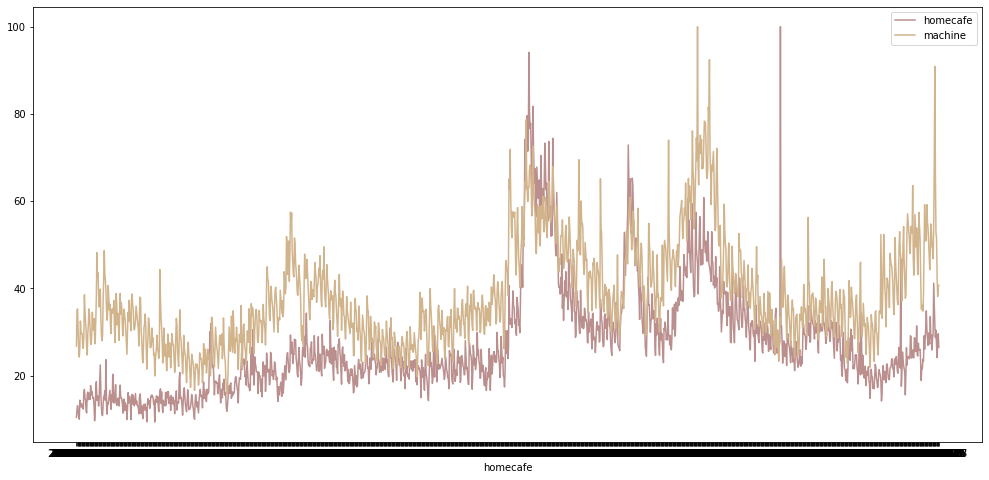

In [9]:
x= trend['homecafe']
y= trend['machine']
plt.plot(x ,label='homecafe',c = 'rosybrown')
plt.plot(y, label='machine',c = 'tan')
plt.legend()
plt.xlabel('homecafe')
plt.show()

In [10]:
trend_month = pd.read_csv("trend_month.csv", encoding = 'utf-8',index_col='Date' )
trend_month

,Corona,Homecafe,Machine
Date,,,
2018-01-01,0.02707,3.22,40.08
2018-02-01,0.02204,3.08,41.97
2018-03-01,0.02372,3.34,46.46
2018-04-01,0.02461,3.03,38.64
2018-05-01,0.02670,3.20,35.30
2018-06-01,0.03784,3.14,32.33
2018-07-01,0.03443,3.27,30.67
2018-08-01,0.03616,4.13,31.98
2018-09-01,0.02787,3.72,32.81


In [26]:
trend_month

,Corona,Homecafe,Machine
Date,,,
2018-01-01,0.001122,0.297107,2.714554
2018-02-01,0.000116,0.078186,3.259772
2018-03-01,0.000452,0.484754,4.555027
2018-04-01,0.000630,0.000000,2.299149
2018-05-01,0.001048,0.265833,1.335641
2018-06-01,0.003277,0.172009,0.478869
2018-07-01,0.002595,0.375293,0.000000
2018-08-01,0.002941,1.720094,0.377903
2018-09-01,0.001282,1.078968,0.617337


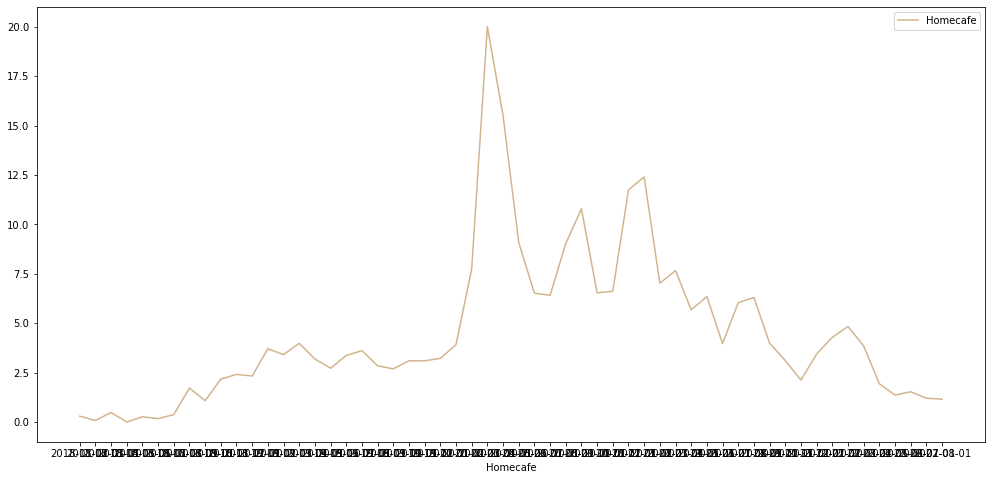

In [27]:
x= trend_month['Homecafe']
y = trend_month.index
plt.plot(x ,label='Homecafe',c = 'tan')
plt.legend()
plt.xlabel('Homecafe')
plt.show()

In [25]:
trend_month=(trend_month-trend_month.min())/(trend_month.max()-trend_month.min())*20

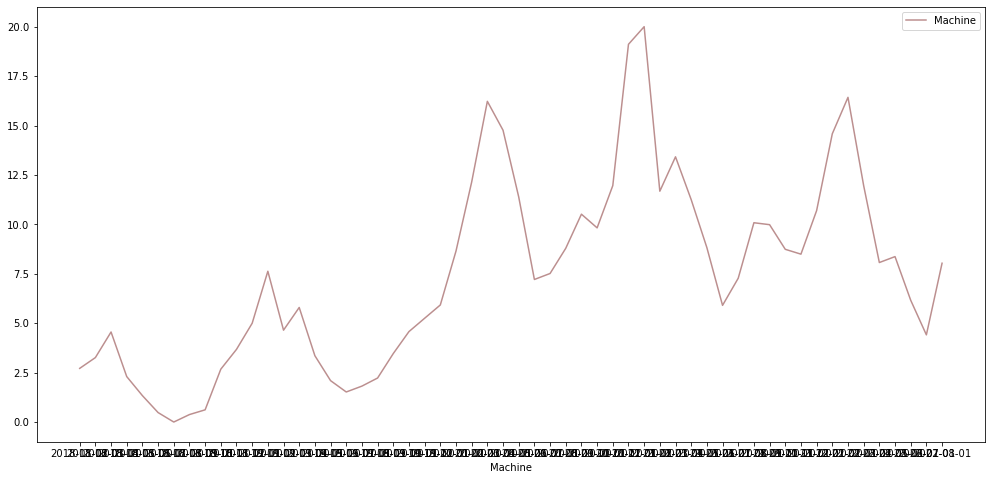

In [28]:
x= trend_month['Machine']
y = trend_month.index
plt.plot(x ,label='Machine',c = 'rosybrown')
plt.legend()
plt.xlabel('Machine')
plt.show()

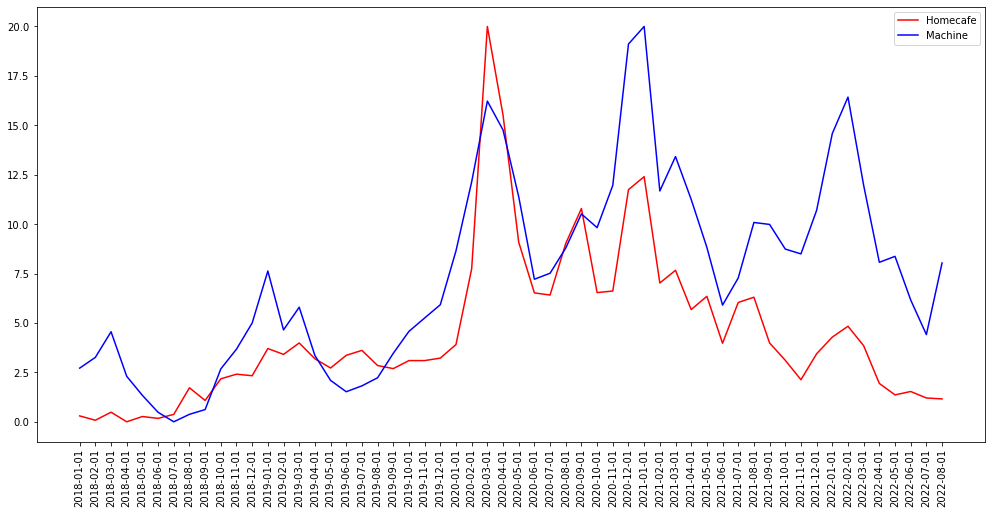

In [32]:
x= trend_month['Homecafe']
y= trend_month['Machine']
plt.plot(x ,label='Homecafe',c = 'r')
plt.plot(y, label='Machine',c = 'b')
plt.xticks(rotation=90)
plt.legend()
plt.show()